# Minería de Datos

Práctica 5 - Miguel Esteban Piedra López A64389

## 1. Conjunto de Datos

Proceda a descargar usando los datasets de scikit-learn el conjunto de datos llamado breast_cancer. Imprima las dimensiones del conjunto de datos, tanto a nivel de atributos como a nivel de clases.

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [406]:
from sklearn.datasets import load_breast_cancer

In [407]:
cancer = load_breast_cancer()
print("El conjunto de datos breast_cancer posee",cancer.data.shape[1],"atributos y",cancer.data.shape[0],"instancias." 
      " Las clases",cancer.target_names[0],"y",cancer.target_names[1],"etiquetan estos valores.")

El conjunto de datos breast_cancer posee 30 atributos y 569 instancias. Las clases malignant y benign etiquetan estos valores.


## 2. Algoritmos de clasificación:


Seleccione 5 algoritmos de clasificación, procure evitar el uso de los algoritmos básicos, de hecho puede recurrir al uso de algoritmos que no se hayan visto en clase. Para cada algoritmo construya el clasificador usando los parámetros "estimados" o "por defecto".

In [408]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC

## 3. Validación tradicional:


Separe el conjunto de entrenamiento, del conjunto de pruebas (30% para pruebas) y determine la eficiencia de cada método, con los valores "estimados" o "por defecto" del método.

In [409]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.30, random_state=77)

### Bernoulli NB

In [410]:
clf1=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
clf1.fit(x_train, y_train)
print("Training score: {:.3f}".format(clf1.score(x_train, y_train)))
print("Test score: {:.3f}".format(clf1.score(x_test, y_test)))

Training score: 0.623
Test score: 0.637


### Multinomial NB

In [411]:
clf2 = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
clf2.fit(x_train, y_train)
print("Training score: {:.3f}".format(clf2.score(x_train, y_train)))
print("Test score: {:.3f}".format(clf2.score(x_test, y_test)))

Training score: 0.894
Test score: 0.901


### Gaussian Process Classifier

In [412]:
clf3=GaussianProcessClassifier(kernel=None, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0, max_iter_predict=100, warm_start=False, random_state=None, multi_class='one_vs_rest', n_jobs=1)
clf3.fit(x_train, y_train)
print("Training score: {:.3f}".format(clf3.score(x_train, y_train)))
print("Test score: {:.3f}".format(clf3.score(x_test, y_test)))

Training score: 1.000
Test score: 0.912


### Quadratic Discrimant Analysis

In [413]:
clf4 = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=False, store_covariances=None, tol=0.0001)
clf4.fit(x_train, y_train)
print("Training score: {:.3f}".format(clf4.score(x_train, y_train)))
print("Test score: {:.3f}".format(clf4.score(x_test, y_test)))

Training score: 0.970
Test score: 0.971


### Support Vector Classifier

In [414]:
clf5 = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)
clf5.fit(x_train, y_train)
print("Training score: {:.3f}".format(clf5.score(x_train, y_train)))
print("Test score: {:.3f}".format(clf5.score(x_test, y_test)))

Training score: 1.000
Test score: 0.637


## 4. Afinamiento de parámetros del clasificador:

Para cada método determine los mejores parámetros de manera tal que evite overfitting y underfitting. RECOMENDACIÓN: Construya una curva (cuando sea posible) de accuracy vrs. x_parametro, donde x_parametro corresponde al(os) parámetro(s) según el método elegido.

### Bernoulli NB

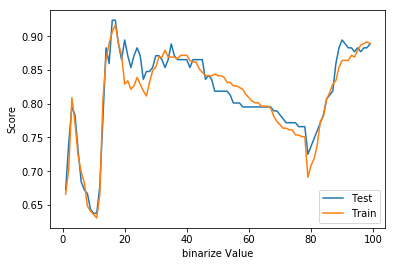

In [415]:
lista1=[]
lista2=[]
numeros = range(1,100)
for n in numeros:
    clf6=BernoulliNB(alpha=1.0, binarize=n, class_prior=None, fit_prior=True)
    clf6.fit(x_train, y_train)
    score_temp=clf6.score(x_test, y_test)
    score_temp2=clf6.score(x_train, y_train)
    lista1.append(score_temp)
    lista2.append(score_temp2)
    

plt.plot(numeros,lista1, label="Test")
plt.plot(numeros,lista2, label="Train")
plt.xlabel("binarize Value")
plt.ylabel("Score")
plt.legend(loc=4)
plt.show()

Establecer un valor del parámetro binarize de alrededor a 15 produce un modelo mucho mejor ajustado.

### Multinomial NB

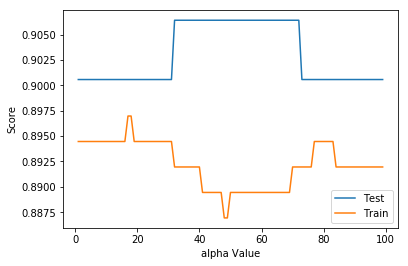

In [416]:
lista1=[]
lista2=[]
numeros = range(1,100)
for n in numeros:
    clf7=MultinomialNB(alpha=n, class_prior=None, fit_prior=True)
    clf7.fit(x_train, y_train)
    score_temp=clf7.score(x_test, y_test)
    score_temp2=clf7.score(x_train, y_train)
    lista1.append(score_temp)
    lista2.append(score_temp2)
    

plt.plot(numeros,lista1, label="Test")
plt.plot(numeros,lista2, label="Train")
plt.xlabel("alpha Value")
plt.ylabel("Score")
plt.legend(loc=4)
plt.show()

Establecer un valor del parámetro alpha de alrededor a 17 produce un modelo mucho con un training score un poco mejor, pero el modelo varía muy poco. Ya tenía muy buenos scores.

### Gaussian Process Classifier

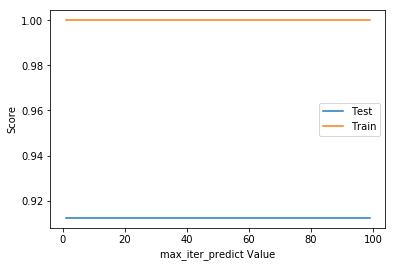

In [417]:
lista1=[]
lista2=[]
numeros = range(1,100)
for n in numeros:
    clf9=GaussianProcessClassifier(kernel=None, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0, max_iter_predict=n, warm_start=False, random_state=None, multi_class='one_vs_rest', n_jobs=1)
    clf9.fit(x_train, y_train)
    score_temp=clf9.score(x_test, y_test)
    score_temp2=clf9.score(x_train, y_train)
    lista1.append(score_temp)
    lista2.append(score_temp2)
    

plt.plot(numeros,lista1, label="Test")
plt.plot(numeros,lista2, label="Train")
plt.xlabel("max_iter_predict Value")
plt.ylabel("Score")
plt.legend(loc=5)
plt.show()

Se intentarón modificar varios valores de parámetros pero ninguno cambió los scores finales testing o de training que ya eran bastante altos de todas maneras.

### Quadratic Discrimant Analysis

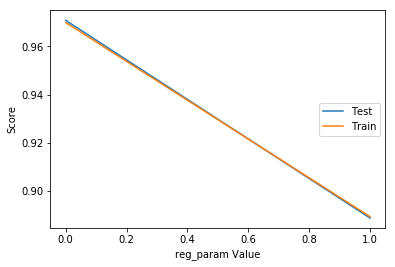

In [418]:
lista1=[]
lista2=[]
numeros = range(0,2)
for n in numeros:
    clf8 = QuadraticDiscriminantAnalysis(priors=None, reg_param=n, store_covariance=True, store_covariances=None, tol=0.0001)
    clf8.fit(x_train, y_train)
    score_temp=clf8.score(x_test, y_test)
    score_temp2=clf8.score(x_train, y_train)
    lista1.append(score_temp)
    lista2.append(score_temp2)
    

plt.plot(numeros,lista1, label="Test")
plt.plot(numeros,lista2, label="Train")
plt.xlabel("reg_param Value")
plt.ylabel("Score")
plt.legend(loc=5)
plt.show()

Modificar los valores del parámetro reg_param causa que los valores de test y de training bajen un poco. Igualmente, en caso de que haya overfitting, es necesario experimentar con los parámetros que son muy buenos aunque se varíe este valor.

### Support Vector Classifier

In [421]:
clf10 = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)
clf10.fit(x_train, y_train)
print("Training score: {:.3f}".format(clf10.score(x_train, y_train)))
print("Test score: {:.3f}".format(clf10.score(x_test, y_test)))

Training score: 0.975
Test score: 0.965


Los scores del modelo mejoran considerablemente al utilizar un kernel linear.

## 5. Validación cruzada:

Utilice dos de los métodos de Cross-Validation y aplíquelos a cada método de clasificación.

## Shuffle Split CV

In [422]:
from sklearn.model_selection import ShuffleSplit

### Bernoulli NB

In [423]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
clf11=BernoulliNB(alpha=1.0, binarize=15, class_prior=None, fit_prior=True)
scores = cross_val_score(clf11, cancer.data, cancer.target, cv=shuffle_split)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.86666667  0.87719298  0.86666667  0.87017544  0.86666667]


### Multinomial NB

In [424]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
clf12=MultinomialNB(alpha=17, class_prior=None, fit_prior=True)
scores = cross_val_score(clf12, cancer.data, cancer.target, cv=shuffle_split)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.88421053  0.90877193  0.8877193   0.89824561  0.88070175]


### Gaussian Process Classifier

In [425]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
clf13=GaussianProcessClassifier(max_iter_predict=50, n_restarts_optimizer=0, random_state=0)
scores = cross_val_score(clf13, cancer.data, cancer.target, cv=shuffle_split)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.92982456  0.92280702  0.89824561  0.93333333  0.9122807 ]


### Quadratic Discrimant Analysis

In [426]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
clf14=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.7, store_covariance=True, store_covariances=None, tol=0.0001)
scores = cross_val_score(clf14, cancer.data, cancer.target, cv=shuffle_split)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.92280702  0.92982456  0.90877193  0.90877193  0.93333333]


### Support Vector Classifier

In [427]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
clf15=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)
scores = cross_val_score(clf15, cancer.data, cancer.target, cv=shuffle_split)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.95789474  0.94035088  0.94736842  0.94035088  0.93684211]


## k-fold

In [428]:
from sklearn.model_selection import cross_val_score

### Bernoulli NB

In [429]:
clf16=BernoulliNB(alpha=1.0, binarize=15, class_prior=None, fit_prior=True)
scores = cross_val_score(clf16, cancer.data, cancer.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.82608696  0.86086957  0.88495575  0.86725664  0.84955752]


### Multinomial NB

In [430]:
clf17=MultinomialNB(alpha=17, class_prior=None, fit_prior=True)
scores = cross_val_score(clf17, cancer.data, cancer.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.86956522  0.90434783  0.87610619  0.92920354  0.90265487]


### Gaussian Process Classifier

In [431]:
clf18=GaussianProcessClassifier(max_iter_predict=50, n_restarts_optimizer=0, random_state=0)
scores = cross_val_score(clf18, cancer.data, cancer.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.86956522  0.92173913  0.91150442  0.92035398  0.91150442]


### Quadratic Discrimant Analysis

In [432]:
clf19=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.7, store_covariance=True, store_covariances=None, tol=0.0001)
scores = cross_val_score(clf19, cancer.data, cancer.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.95652174  0.91304348  0.94690265  0.9380531   0.89380531]


### Support Vector Classifier

In [433]:
clf20=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)
scores = cross_val_score(clf20, cancer.data, cancer.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.94782609  0.93043478  0.97345133  0.92035398  0.95575221]


## 6. Conclusiones:

Destaque las conclusiones más relevantes basado en los resultados obtenidos.

Al realizer la validación tradicional, se puede ver como los clasificadores Bernouli NB y Support Vector presentan underfitting. El clasificador Quadratic Discriminant y el Gaussian Process presenta más bien overfitting y el que mejor se ajusta de entrada Multinomial NB que da buenos valores para los testing y training scores. Al realizar el afinamiento de parámetros, los resultados mejoran mucho, donde todos los clasificadores empiezan a mandar scores de modelos adecuadamente ajustados, aunque algunos siguen muy cerca del overfitting, ya no hay modelos underfitting. Esto se confirma con la validación cruzada, ya que los valores siguen siendo muy buenos en todos los algoritmos utilizados. Es posible a partir de los atributos, diferenciar entre tejido de cáncer de mama maligno o benigno. 